# Image Classification using Logistic Regression and Softmax Regression
### Fashion-MNIST Dataset

## 1. Install Required Libraries
Before starting, you need to install the necessary Python libraries:
- **TensorFlow**: Used for building and training the Softmax Regression model.
- **Scikit-Learn**: Provides the Logistic Regression implementation.
- **Matplotlib**: Used for plotting images and confusion matrices.
```bash
pip install tensorflow scikit-learn matplotlib
```


## 2. Import Necessary Libraries
In this step, we import the necessary libraries to handle data processing, model training, and evaluation.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical


## 3. Load and Preprocess the Fashion-MNIST Dataset
Fashion-MNIST is a dataset of Zalando's article images consisting of 60,000 training images and 10,000 test images, categorized into 10 classes.


In [8]:
# Load the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
# flatten the images
train_images_flat = train_images.reshape(train_images.shape[0], 28 * 28)
test_images_flat = test_images.reshape(test_images.shape[0], 28 * 28)

## 4. Logistic Regression for Image Classification
Logistic Regression is used for multi-class classification. We fit the model using the flattened images.

In [13]:
model = LogisticRegression()
model.fit(train_images_flat, train_labels)
pred = model.predict(test_images_flat)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
result=accuracy_score(test_labels, pred)
result

0.8439

## 5. Softmax Regression (Using TensorFlow/Keras)
Softmax Regression is implemented using a simple neural network in TensorFlow/Keras.

In [31]:
model2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [32]:
model2.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy'])

history=model2.fit(train_images, train_labels, epochs = 10, batch_size = 32, validation_data = (test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7776 - loss: 0.6315 - val_accuracy: 0.8460 - val_loss: 0.4258
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8623 - loss: 0.3854 - val_accuracy: 0.8626 - val_loss: 0.3864
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8764 - loss: 0.3408 - val_accuracy: 0.8634 - val_loss: 0.3797
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.8849 - loss: 0.3148 - val_accuracy: 0.8633 - val_loss: 0.3859
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 12ms/step - accuracy: 0.8940 - loss: 0.2935 - val_accuracy: 0.8629 - val_loss: 0.3745
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 9ms/step - accuracy: 0.8965 - loss: 0.2793 - val_accuracy: 0.8765 - val_loss: 0.3444
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9024 - loss: 0.2626 - val_accuracy: 0.8827 - val_loss: 0.3345
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9043 - loss: 0

In [34]:
predicion= model2.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


## 6. Visualize Model Predictions
We visualize the predictions made by the Softmax Regression model on the test dataset.

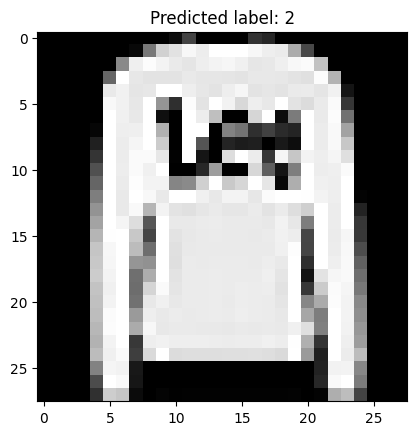

In [42]:
# Plot the predictions for one image
plt.imshow(test_images[1], cmap='gray')
plt.title(f'Predicted label: {np.argmax(predicion[1])}')
plt.show()

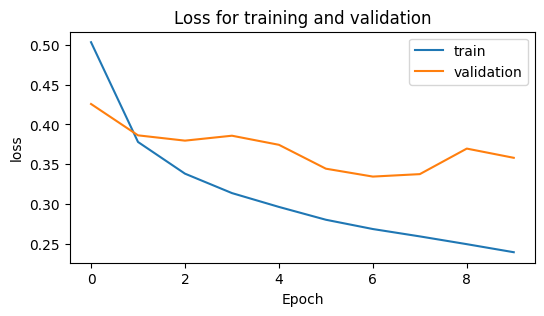

In [37]:
# loss for training and validation
plt.figure(figsize=(6, 3))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss for training and validation')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'])
plt.show()

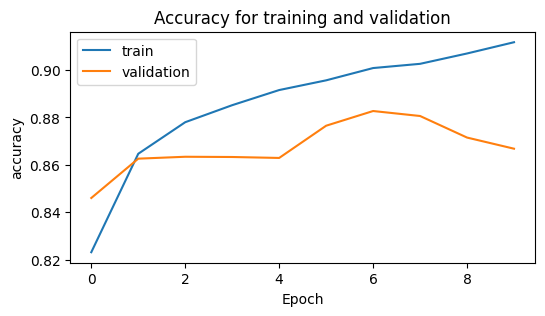

In [38]:
# loss for training and validation
plt.figure(figsize=(6, 3))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy for training and validation')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'])
plt.show()

### Summary
- **Logistic Regression**: You flattened the images and used `LogisticRegression` from Scikit-Learn to classify the Fashion-MNIST dataset.
- **Softmax Regression**: You used TensorFlow/Keras to build a simple neural network with a softmax activation function to classify the same dataset.